# Module 1: Machine Learning

### Machine Learning 

ML uses algorithms that can learn from data without relying on explicitely programmed methods.

### Python Tools:
* numpy:      A math library to work with n-dimensional arrays, enablingyou to do computation efficiently and effectively.
* scipy:      A collection of numerical algorithms and domain-specific toolboxes, and a good library for scientific and high-performance computation.
* matplotlib: A popular plotting package that provides 2D plotting as well as 3D plotting.

* pandas:     A library that provides high-performance, easy to use data structures.
* scikit-learn:    A collection of algorithms and tools for machine learning.

### Supervised Learning

SL-Classification classifies *labeled* data. Classification is a **categorical** prediction; Regression is a **numerical** prediction.

### Unsupervised Learning
* UL has fewer evaluation methods than SL, and more complex algorithms.
* **Dimension Reduction** reduces the number of parameters.
* **Density Estimation** is a simple concept to explore underlying structures in the data.
* **Market Basket Analysis** considers, for example, which items are customarily bought together.
* **Clustering** - the most popular UL technique - groups data points that are similar. It is used mostly for: Discovering structure, Summarization, and Anomaly detection. UL-Clustering classifies *unlabeled* data.

# Module 2: Regression
## Regression Algorithms 
## Model Evaluation 
## Model Evaluation: Overfitting & Underfitting
## Understanding Different Evaluation Models
## Simple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [7]:
UserPath = "/home/cerbero/"

ImportPath = UserPath+"Documents/edX/IBM Python Data Science Professional Certificate/IBM ML0101EN/00/"
ExportPath = UserPath+"Documents/edX/IBM Python Data Science Professional Certificate/IBM ML0101EN/01/"


In [9]:
#downloaded on Nov 6 from https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

df = pd.read_csv(ImportPath+"FuelConsumptionCo2.csv")

In [12]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7205ad1c50>,
      dtype=object)

<Figure size 864x576 with 0 Axes>

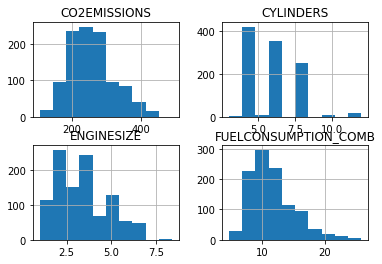

In [27]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()


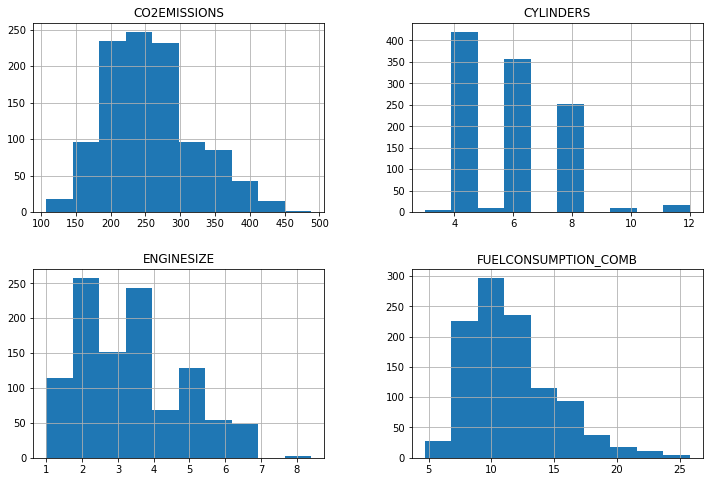

In [44]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca() #gca gets the current Axes instance on the current figure matching the given 
#keyword args, or create one.
cdf.hist(ax = ax)
# much nicer
plt.savefig(ExportPath+"Histograms.png")

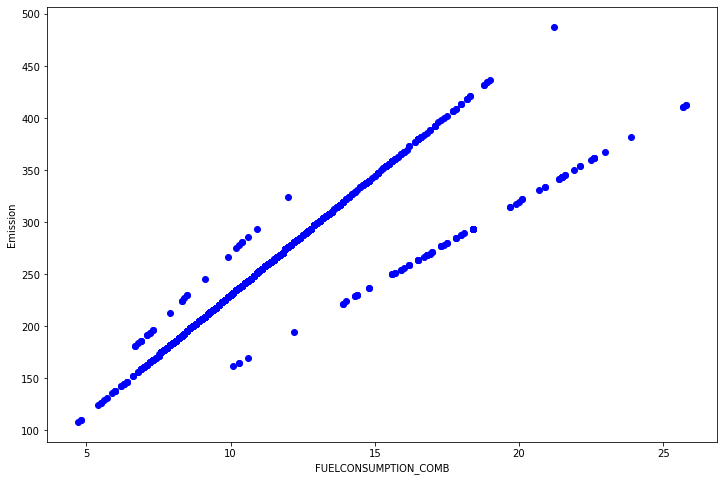

In [45]:
plt.figure(figsize = (12,8))
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Scatterplot Consumption vs Emissions.png")

This graph above is a bit odd... there appears to be two, three types of engine which Emission = f(fuel consumption) drastically varies. And linearly. Three different linear functions.

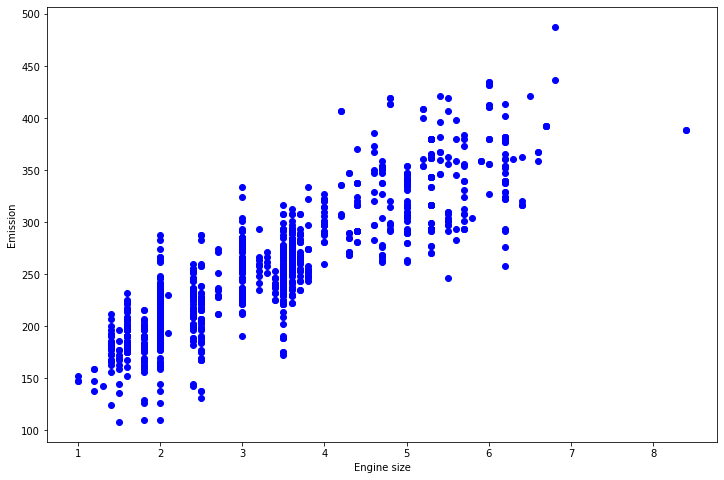

In [46]:
plt.figure(figsize = (12,8))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Scatterplot Engine vs Emissions.png")

This looks nicer.

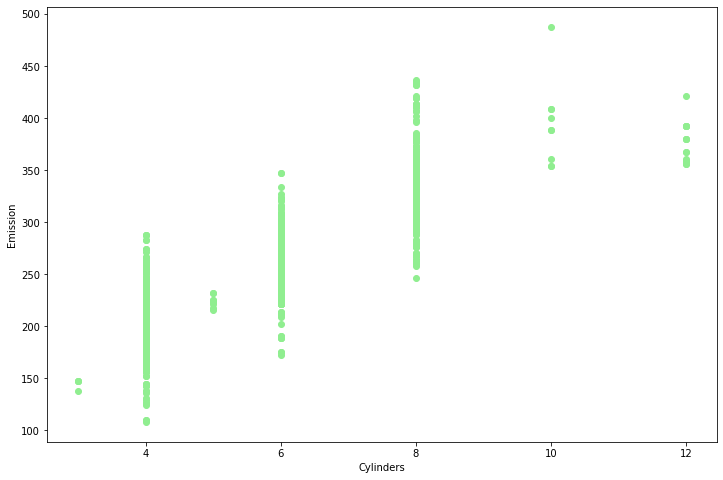

In [47]:
#plot CYLINDER vs the Emission, to see how linear is their relation:
plt.figure(figsize = (12,8))
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='lightgreen')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Scatterplot Cylinders vs Emissions.png")

In [37]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
#this is to divide between training and testing sets in plain Python
train.describe(), test.describe()

(       ENGINESIZE   CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
 count  849.000000  849.000000            849.000000    849.000000
 mean     3.318375    5.743227             11.570789    256.113074
 std      1.400039    1.742918              3.514860     63.683948
 min      1.000000    3.000000              4.800000    110.000000
 25%      2.000000    4.000000              9.000000    207.000000
 50%      3.300000    6.000000             10.900000    251.000000
 75%      4.000000    8.000000             13.300000    294.000000
 max      8.400000   12.000000             25.800000    488.000000,
        ENGINESIZE   CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
 count  218.000000  218.000000            218.000000    218.000000
 mean     3.455046    5.995413             11.620183    256.678899
 std      1.474295    1.987281              3.376806     62.286151
 min      1.000000    4.000000              4.700000    108.000000
 25%      2.000000    4.000000              9.025000    207.0

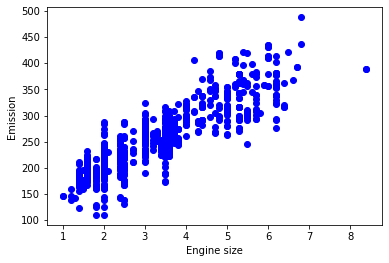

In [48]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Training Scatterplot Engine vs Emissions.png")

In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.77848386]]
Intercept:  [124.11316541]


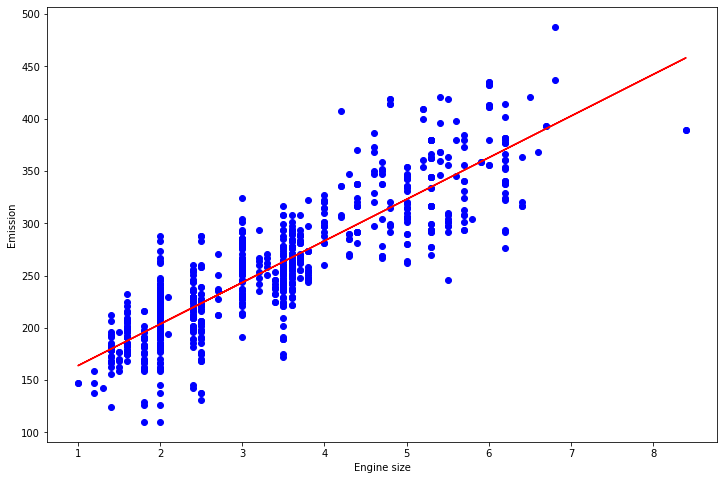

In [49]:
plt.figure (figsize = (12,8))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Training Regression Engine vs Emissions.png")

In [ ]:
# df.to_csv(ExportPath+df = pd.read_csv("FuelConsumption.csv"))